In [59]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [60]:
company=pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [61]:
label_encoder = preprocessing.LabelEncoder()
company['Sales']= label_encoder.fit_transform(company['Sales']) 
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,Bad,42,17,Yes,Yes
1,297,111,48,16,260,83,Good,65,10,Yes,Yes
2,267,113,35,10,269,80,Medium,59,12,Yes,Yes
3,158,117,100,4,466,97,Medium,55,14,Yes,Yes
4,37,141,64,3,340,128,Bad,38,13,Yes,No


In [62]:
company['Sales_New']=pd.cut(company.Sales,bins=[0,163,335],labels=['Low','High'])
company.drop(['Sales'],axis=1,inplace=True)
company.head()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_New
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [63]:
company['Sales_New'].value_counts()

Low     200
High    199
Name: Sales_New, dtype: int64

In [64]:
data=pd.get_dummies(company)
data

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_New_Low,Sales_New_High
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1,0
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1,0
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1,0
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1,0


In [65]:
data.drop(['Sales_New_High'],axis=1)


,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales_New_Low
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1


In [66]:
x=data.iloc[:,0:14]
y=data['Sales_New_Low']

In [90]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=45)

# Building Decision Tree Classifier using Entropy Criteria

In [68]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

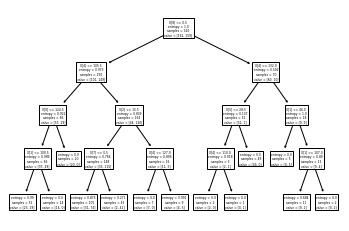

In [69]:
#PLot the decision tree
tree.plot_tree(model);


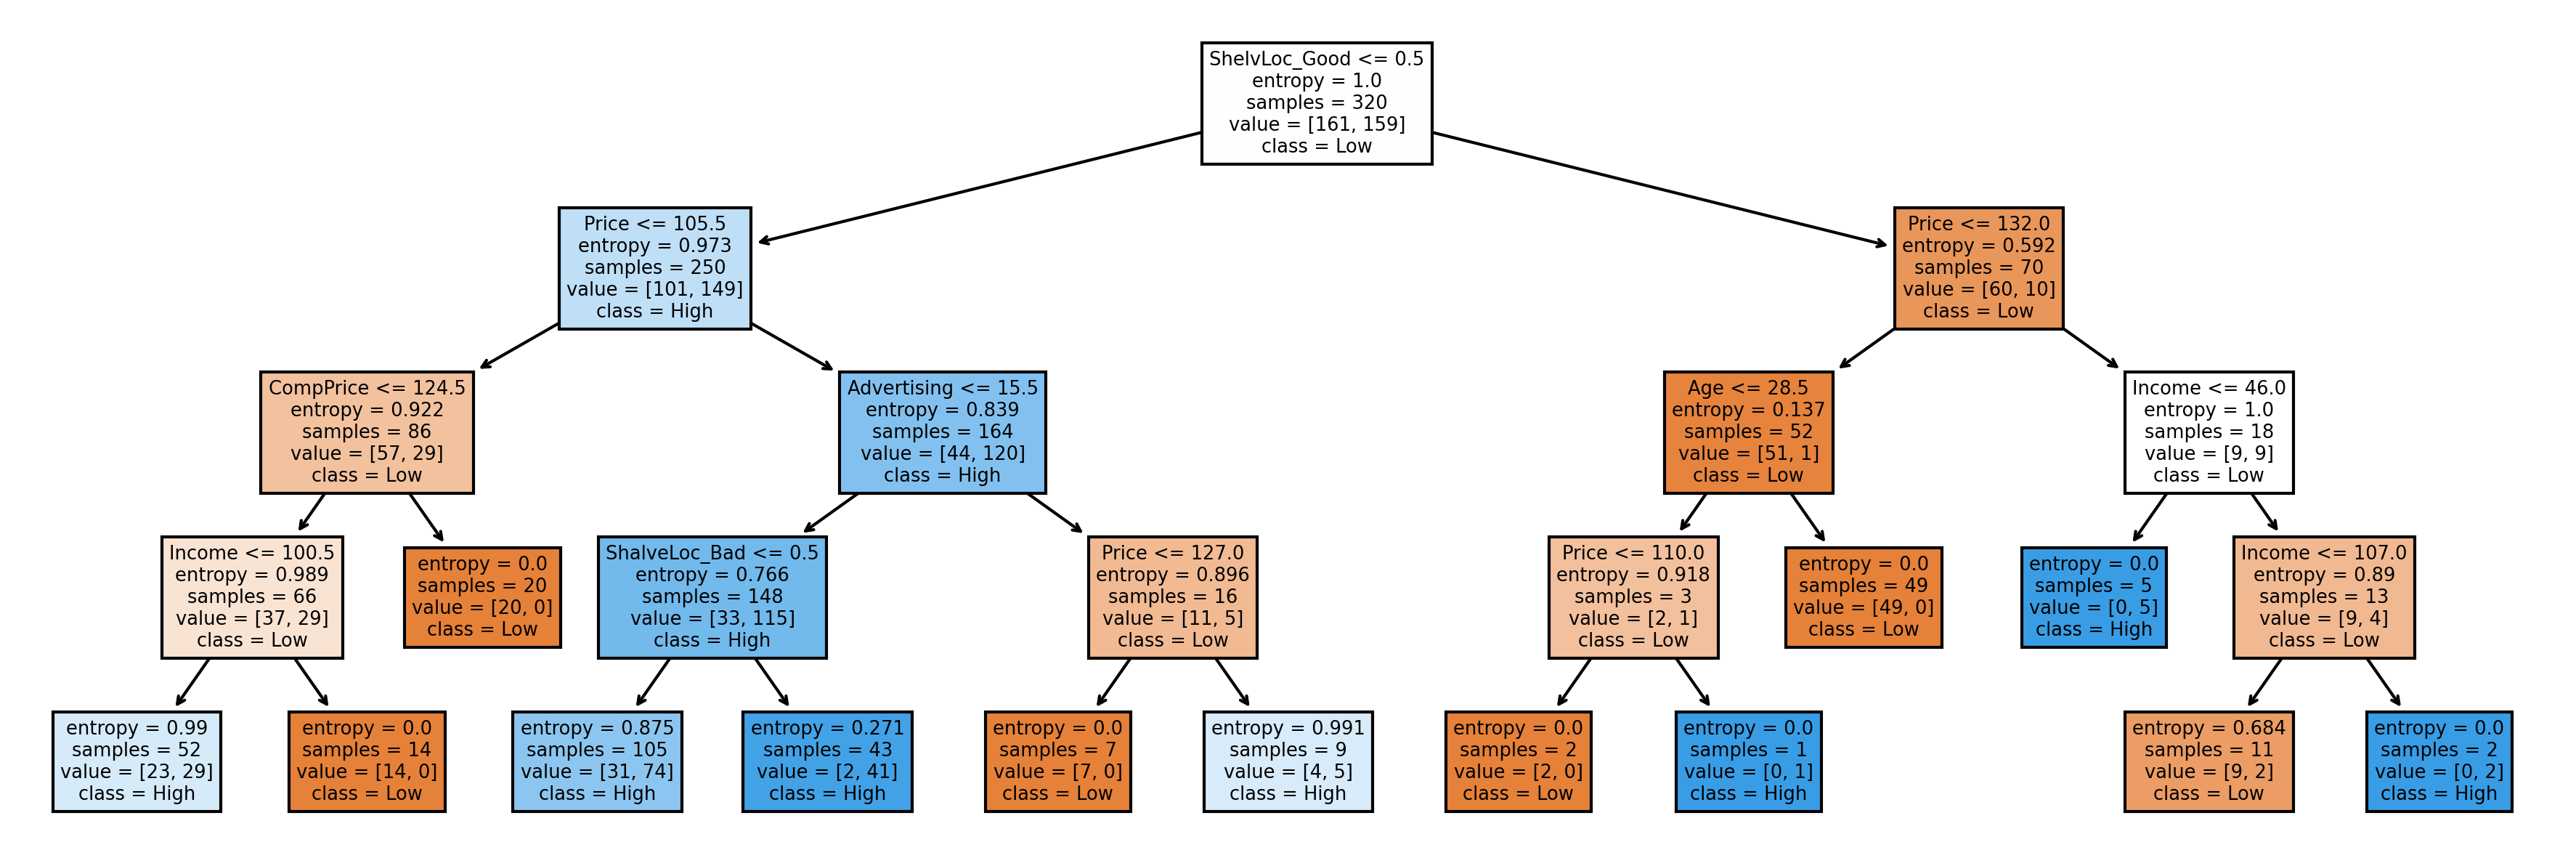

In [71]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShalveLoc_Bad','ShelvLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [44]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [45]:
pd.Series(preds).value_counts() # getting the count of each category 

1    56
0    24
dtype: int64

In [46]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales_New_Low,,
0,20,19
1,4,37


In [47]:
# Accuracy 
np.mean(preds==y_test)

0.7125

# Building Decision Tree Classifier (CART) using Gini Criteria

In [48]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [49]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)


0.7125